# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import scipy
from datetime import datetime
import openweathermapy.core as owm


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:

# Lists for holding lat_lngs and cities
lat_lngs = []
cities = []
country_codes = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=800)
lngs = np.random.uniform(low=-180.000, high=180.000, size=800)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.city_name)
        country_codes.append(city.country_code)
        
country_codes = [x.upper() for x in country_codes]

# Print the city count to confirm sufficient count
print(len(cities))
print(len(country_codes))
#print(cities)

800
800


In [3]:
#print(country_codes)

In [4]:
#print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#API url and key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query = f"{url}appid={api_key}&units={units}&q="

#create empty lists to append necessary weather data
lat = []
long = []
temp = []
humid = []
cloud = []
wind = []
#initiate record number counter
number = 1

#begin loop through cities to get weather data from openweathermap
print("Beginning Data Retrieval")
print("-----------------------------------")

for x in range(len(cities)):
    try:
        response = requests.get(f'{query}{cities[x]},{country_codes[x].upper()}').json() 
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        number = number + 1
# print status and city name
        print(f' Processing City Record {number} of {len(cities)} complete. | {cities[x].upper()},{country_codes[x].upper()}')
# make exception for cities with no data        
    except KeyError:
        print(f'City not found. Missing data in city number {number} of {len(cities)}. | Skipping {cities[x].upper()},{country_codes[x].upper()}')
        lat.append(np.nan)
        long.append(np.nan)
        temp.append(np.nan)
        humid.append(np.nan)
        cloud.append(np.nan)
        wind.append(np.nan)
        number = number + 1

print("-----------------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval
-----------------------------------
City not found. Missing data in city number 1 of 800. | Skipping NIZHNEYANSK,RU
 Processing City Record 3 of 800 complete. | ALBANY,AU
 Processing City Record 4 of 800 complete. | SELIKHINO,RU
 Processing City Record 5 of 800 complete. | QAANAAQ,GL
 Processing City Record 6 of 800 complete. | CASTRO,CL
 Processing City Record 7 of 800 complete. | BUTARITARI,KI
 Processing City Record 8 of 800 complete. | MAREEBA,AU
 Processing City Record 9 of 800 complete. | KAVIENG,PG
 Processing City Record 10 of 800 complete. | HOBART,AU
City not found. Missing data in city number 10 of 800. | Skipping ELAT,IL
 Processing City Record 12 of 800 complete. | CAPE TOWN,ZA
 Processing City Record 13 of 800 complete. | CACONDA,AO
 Processing City Record 14 of 800 complete. | ALBANY,AU
 Processing City Record 15 of 800 complete. | BODDAM,GB
 Processing City Record 16 of 800 complete. | CHIVILCOY,AR
 Processing City Record 17 of 800 complete. | R

 Processing City Record 133 of 800 complete. | CAPE TOWN,ZA
 Processing City Record 134 of 800 complete. | KAHULUI,US
 Processing City Record 135 of 800 complete. | FAIRBANKS,US
 Processing City Record 136 of 800 complete. | CAPE TOWN,ZA
 Processing City Record 137 of 800 complete. | MAGISTRALNYY,RU
City not found. Missing data in city number 137 of 800. | Skipping BARENTSBURG,SJ
 Processing City Record 139 of 800 complete. | PUNTA ARENAS,CL
 Processing City Record 140 of 800 complete. | RIKITEA,PF
 Processing City Record 141 of 800 complete. | BREDASDORP,ZA
 Processing City Record 142 of 800 complete. | BUTARITARI,KI
 Processing City Record 143 of 800 complete. | QAANAAQ,GL
 Processing City Record 144 of 800 complete. | THOMPSON,CA
 Processing City Record 145 of 800 complete. | CARAVELAS,BR
 Processing City Record 146 of 800 complete. | PORT ALFRED,ZA
 Processing City Record 147 of 800 complete. | TORBAY,CA
 Processing City Record 148 of 800 complete. | USHUAIA,AR
 Processing City Rec

 Processing City Record 266 of 800 complete. | NARRABRI,AU
City not found. Missing data in city number 266 of 800. | Skipping ANAR DARREH,AF
 Processing City Record 268 of 800 complete. | BREDASDORP,ZA
 Processing City Record 269 of 800 complete. | PORT ALFRED,ZA
 Processing City Record 270 of 800 complete. | CHUY,UY
 Processing City Record 271 of 800 complete. | RIKITEA,PF
 Processing City Record 272 of 800 complete. | CAPE TOWN,ZA
 Processing City Record 273 of 800 complete. | MOCTEZUMA,MX
City not found. Missing data in city number 273 of 800. | Skipping OLAFSVIK,IS
 Processing City Record 275 of 800 complete. | EYL,SO
 Processing City Record 276 of 800 complete. | LEBU,CL
 Processing City Record 277 of 800 complete. | MAHEBOURG,MU
 Processing City Record 278 of 800 complete. | EAST LONDON,ZA
City not found. Missing data in city number 278 of 800. | Skipping SAFWAH,SA
 Processing City Record 280 of 800 complete. | PONTA DO SOL,CV
 Processing City Record 281 of 800 complete. | SREDNE

 Processing City Record 398 of 800 complete. | MANDIANA,GN
City not found. Missing data in city number 398 of 800. | Skipping BEREDA,SO
 Processing City Record 400 of 800 complete. | PUNTA ARENAS,CL
 Processing City Record 401 of 800 complete. | VAINI,TO
 Processing City Record 402 of 800 complete. | PUNTA ARENAS,CL
 Processing City Record 403 of 800 complete. | HOBART,AU
 Processing City Record 404 of 800 complete. | EAST LONDON,ZA
 Processing City Record 405 of 800 complete. | TORBAY,CA
 Processing City Record 406 of 800 complete. | RIKITEA,PF
 Processing City Record 407 of 800 complete. | VAINI,TO
 Processing City Record 408 of 800 complete. | BREDASDORP,ZA
City not found. Missing data in city number 408 of 800. | Skipping ILLOQQORTOORMIUT,GL
 Processing City Record 410 of 800 complete. | BUSSELTON,AU
 Processing City Record 411 of 800 complete. | COQUIMBO,CL
 Processing City Record 412 of 800 complete. | HONNINGSVAG,NO
City not found. Missing data in city number 412 of 800. | Skipp

 Processing City Record 531 of 800 complete. | NARSAQ,GL
City not found. Missing data in city number 531 of 800. | Skipping NIZHNEYANSK,RU
 Processing City Record 533 of 800 complete. | KYSYL-SYR,RU
 Processing City Record 534 of 800 complete. | KILRUSH,IE
 Processing City Record 535 of 800 complete. | RIKITEA,PF
 Processing City Record 536 of 800 complete. | BARROW,US
 Processing City Record 537 of 800 complete. | BARROW,US
 Processing City Record 538 of 800 complete. | CHUY,UY
City not found. Missing data in city number 538 of 800. | Skipping UMZIMVUBU,ZA
 Processing City Record 540 of 800 complete. | QAANAAQ,GL
 Processing City Record 541 of 800 complete. | TORBAY,CA
 Processing City Record 542 of 800 complete. | KAITANGATA,NZ
 Processing City Record 543 of 800 complete. | SHERIDAN,US
City not found. Missing data in city number 543 of 800. | Skipping GRAND RIVER SOUTH EAST,MU
 Processing City Record 545 of 800 complete. | OLINDA,BR
 Processing City Record 546 of 800 complete. | FORT

City not found. Missing data in city number 666 of 800. | Skipping FAYA,TD
 Processing City Record 668 of 800 complete. | CAPE TOWN,ZA
 Processing City Record 669 of 800 complete. | CASTRO,CL
 Processing City Record 670 of 800 complete. | ALBANY,AU
 Processing City Record 671 of 800 complete. | PUNTA ARENAS,CL
 Processing City Record 672 of 800 complete. | LEBU,CL
City not found. Missing data in city number 672 of 800. | Skipping BARENTSBURG,SJ
 Processing City Record 674 of 800 complete. | BUKAN,IR
 Processing City Record 675 of 800 complete. | USHUAIA,AR
 Processing City Record 676 of 800 complete. | RIKITEA,PF
 Processing City Record 677 of 800 complete. | EAST LONDON,ZA
 Processing City Record 678 of 800 complete. | HILO,US
 Processing City Record 679 of 800 complete. | YINGKOU,CN
 Processing City Record 680 of 800 complete. | BINDURA,ZW
City not found. Missing data in city number 680 of 800. | Skipping MARCONA,PE
 Processing City Record 682 of 800 complete. | NECOCHEA,AR
City not 

 Processing City Record 800 of 800 complete. | COMODORO RIVADAVIA,AR
 Processing City Record 801 of 800 complete. | PEVEK,RU
-----------------------------------
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#convert data to DataFrame
weather_df = pd.DataFrame({"City": cities,
                           "Country": country_codes,
                           "Latitude": lat,
                           "Longitude": long,
                           "Temperature": temp,
                           "Humidity": humid,
                           "Cloudiness": cloud,
                           "Wind Speed": wind,
                          })
#drop NaN values for cities not found
weather_df = weather_df.dropna(how='any')
print(f"The data frame contains {len(weather_df['City'])} unique cities.")
      
#Save dataframe as csv
pd.DataFrame.to_csv(weather_df, 'city_weather_data.csv')

#display DataFrame
weather_df.head(10)

The data frame contains 696 unique cities.


,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
1,albany,AU,-35.02,117.88,68.00,68.0,75.0,16.11
2,selikhino,RU,50.37,137.51,25.41,61.0,1.0,10.71
3,qaanaaq,GL,77.48,-69.36,-5.12,39.0,0.0,5.61
4,castro,CL,-42.48,-73.76,50.00,93.0,87.0,4.70
5,butaritari,KI,3.07,172.79,85.32,60.0,86.0,1.36
6,mareeba,AU,-16.99,145.42,90.21,49.0,0.0,14.99
7,kavieng,PG,-2.57,150.80,79.29,81.0,100.0,4.23
8,hobart,AU,-42.88,147.33,59.54,41.0,75.0,14.99
10,cape town,ZA,-33.93,18.42,61.09,93.0,79.0,10.29
11,caconda,AO,-13.73,15.06,65.97,88.0,100.0,5.53


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

//anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


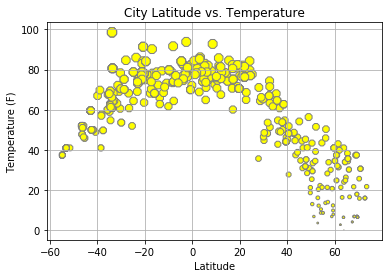

In [7]:
plt.scatter(weather_df['Latitude'], weather_df['Temperature'], marker="8", s=weather_df['Temperature'], facecolors="yellow", edgecolors="gray")

#labeling and formatting
plt.title(f'City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('Lat_Temp.png', bbox_inches='tight')


#### Latitude vs. Humidity Plot

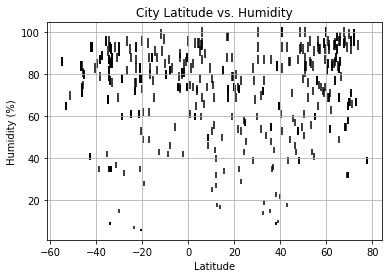

In [8]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], marker="|", s=weather_df['Humidity'], facecolors="black", edgecolors="gray")

#labeling and formatting
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

plt.savefig('lat_humidity.png', bbox_inches='tight')


#### Latitude vs. Cloudiness Plot

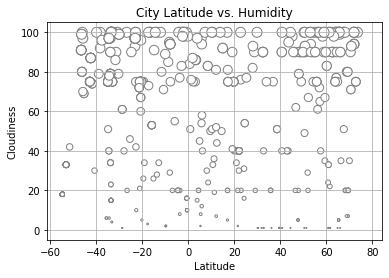

In [9]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], marker="o", s=weather_df['Cloudiness'], facecolors="white", edgecolors="gray")

#labeling and formatting
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

plt.savefig('lat_cloud.png', bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

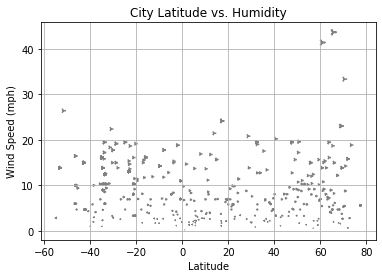

In [10]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'], marker="4", s=weather_df['Wind Speed'], facecolors="gray", edgecolors="black")

#labeling and formatting
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')
